#📌 Extracción

In [62]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos_teleco = pd.read_json(url)
datos_teleco

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## Normalización

In [64]:
df_normalizado_customer = pd.json_normalize(datos_teleco['customer'])
df_normalizado_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [65]:
df_normalizado_phone = pd.json_normalize(datos_teleco['phone'])
df_normalizado_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [66]:
df_normalizado_internet = pd.json_normalize(datos_teleco['internet'])
df_normalizado_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [67]:
df_normalizado_account = pd.json_normalize(datos_teleco['account'])
df_normalizado_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


## columnas anidadas

In [68]:
result=requests.get(url)
df=result.json()
datos_teleco = pd.json_normalize(df)

datos_teleco.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
2690,3728-SDRGN,,Male,0,No,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.25,19.25
6125,8384-FZBJK,No,Female,0,Yes,Yes,57,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.60,5611.7
6543,8992-JQYUN,Yes,Male,0,Yes,No,1,No,No phone service,DSL,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.35,50.35
2320,3230-WYKIR,Yes,Male,0,No,No,18,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),82.00,1425.45
6814,9395-RFMFG,,Male,0,Yes,Yes,8,Yes,No,DSL,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,54.40,475.1
3484,4817-VYYWS,Yes,Female,0,No,No,30,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.20,2983.8
4264,5862-BRIXZ,No,Male,0,No,No,46,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.75,2893.4
1915,2709-UQGNP,No,Male,0,No,No,10,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,51.65,524.5
4229,5816-JMLGY,No,Female,0,Yes,Yes,70,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.40,5717.85
5914,8076-FEZKJ,No,Male,0,No,No,10,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,225.85


#🔧 Transformación

## Exporación de Datos

## **Primeras** Filas

In [111]:
datos_teleco.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,tenure_group
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,0-12m
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,0-12m
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,0-12m
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,13-24m
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,0-12m


##**Nombres de Columnas**

In [112]:
datos_teleco.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'cuentas_diarias',
       'tenure_group'],
      dtype='object')

##**Tipos de Datos**

In [113]:
datos_teleco.dtypes

,0
customerID,object
Churn,int64
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,int64
customer.Dependents,int64
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,category
internet.InternetService,object


##**Información General**

In [114]:
datos_teleco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7043 non-null   object  
 1   Churn                      7043 non-null   int64   
 2   customer.gender            7043 non-null   object  
 3   customer.SeniorCitizen     7043 non-null   int64   
 4   customer.Partner           7043 non-null   int64   
 5   customer.Dependents        7043 non-null   int64   
 6   customer.tenure            7043 non-null   int64   
 7   phone.PhoneService         7043 non-null   object  
 8   phone.MultipleLines        7043 non-null   category
 9   internet.InternetService   7043 non-null   object  
 10  internet.OnlineSecurity    7043 non-null   category
 11  internet.OnlineBackup      7043 non-null   category
 12  internet.DeviceProtection  7043 non-null   category
 13  internet.TechSupport       7043 non-nu

## Incoherencias en los Datos

In [115]:
# Conteo de valores nulos por columna
datos_teleco.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [116]:
print("Tipos de datos:")
datos_teleco.dtypes

Tipos de datos:


,0
customerID,object
Churn,int64
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,int64
customer.Dependents,int64
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,category
internet.InternetService,object


In [117]:
print("Duplicados:", datos_teleco.duplicated().sum())

Duplicados: 0


## Detectar Strings Vacios

In [118]:
(datos_teleco['Churn'] == '').sum()

np.int64(0)

In [119]:
(datos_teleco['account.Charges.Total'] == '').sum()

np.int64(0)

## Reemplazar por NaN

In [120]:
datos_teleco['Churn'] = datos_teleco['Churn'].replace('', np.nan)
datos_teleco['account.Charges.Total'] = datos_teleco['account.Charges.Total'].replace('', np.nan)

In [121]:
(datos_teleco['Churn'] == '').sum()
(datos_teleco['account.Charges.Total'] == '').sum()

np.int64(0)

In [122]:
datos_teleco[["Churn", "account.Charges.Total"]].isnull().sum()

,0
Churn,0
account.Charges.Total,11


Eliminar NaN

In [123]:
datos_teleco = datos_teleco.dropna(subset=['Churn', 'account.Charges.Total'])

In [124]:
datos_teleco[['Churn', 'account.Charges.Total']].isnull().sum()

,0
Churn,0
account.Charges.Total,0


In [125]:
datos_teleco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   object  
 1   Churn                      7032 non-null   int64   
 2   customer.gender            7032 non-null   object  
 3   customer.SeniorCitizen     7032 non-null   int64   
 4   customer.Partner           7032 non-null   int64   
 5   customer.Dependents        7032 non-null   int64   
 6   customer.tenure            7032 non-null   int64   
 7   phone.PhoneService         7032 non-null   object  
 8   phone.MultipleLines        7032 non-null   category
 9   internet.InternetService   7032 non-null   object  
 10  internet.OnlineSecurity    7032 non-null   category
 11  internet.OnlineBackup      7032 non-null   category
 12  internet.DeviceProtection  7032 non-null   category
 13  internet.TechSupport       7032 non-nu

In [126]:
datos_teleco.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,tenure_group
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,0-12m
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,0-12m
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,0-12m
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,13-24m
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,0-12m


## Correcion de Datos

In [127]:
## Convertir a columnas numéricas (si no lo están)
datos_teleco.loc[:, "account.Charges.Total"] = pd.to_numeric(
    datos_teleco["account.Charges.Total"], errors="coerce"
)


In [128]:
datos_teleco["account.Charges.Total"].dtypes

dtype('float64')

In [129]:
# Convertir a Texto
newStr = ['customerID', 'customer.gender', 'internet.InternetService', 'account.Contract', 'account.PaymentMethod']

# Convertirlas
datos_teleco.loc[:, newStr] = datos_teleco[newStr].astype(str)

In [130]:
#crear la variable

columnas_bool = ['Churn','customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'account.PaperlessBilling']
datos_teleco[columnas_bool] = datos_teleco[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

In [131]:
#transformar variable
columnas_categoricas = ['phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']
datos_teleco[columnas_categoricas] = datos_teleco[columnas_categoricas].astype('category')

In [132]:
datos_teleco.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,tenure_group
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667,0-12m
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667,0-12m
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333,0-12m
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667,13-24m
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667,0-12m
5,0013-MHZWF,0,Female,0,0,1,9,Yes,No,DSL,...,Yes,Yes,Yes,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313333,0-12m
6,0013-SMEOE,0,Female,1,1,0,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),109.70,7904.25,3.656667,61-72m
7,0014-BMAQU,0,Male,0,1,0,63,Yes,Yes,Fiber optic,...,Yes,No,No,Two year,1,Credit card (automatic),84.65,5377.80,2.821667,61-72m
8,0015-UOCOJ,0,Female,1,0,0,7,Yes,No,DSL,...,No,No,No,Month-to-month,1,Electronic check,48.20,340.35,1.606667,0-12m
9,0016-QLJIS,0,Female,0,1,1,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Two year,1,Mailed check,90.45,5957.90,3.015000,61-72m


In [133]:
#Columna de cuentas diarias

datos_teleco['cuentas_diarias'] = datos_teleco['account.Charges.Monthly'].astype(float) / 30

In [134]:
datos_teleco.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,tenure_group
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,0-12m
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,0-12m
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,0-12m
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,13-24m
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,0-12m


In [135]:
#Estandarización y transformación de datos
datos_teleco[columnas_bool] = datos_teleco[columnas_bool].astype(int)
datos_teleco[columnas_bool].head()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,account.PaperlessBilling
0,0,0,1,1,1
1,0,0,0,0,0
2,1,0,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1


In [136]:
datos_teleco.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,tenure_group
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,0-12m
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,0-12m
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,0-12m
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,13-24m
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,0-12m


In [137]:
datos_teleco.dtypes

,0
customerID,object
Churn,int64
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,int64
customer.Dependents,int64
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,category
internet.InternetService,object


In [138]:
# Reemplazar valores vacíos
datos_teleco['account.Charges.Total'] = pd.to_numeric(
    datos_teleco['account.Charges.Total'],
    errors='coerce'
)

# Asegurar que quede en float
datos_teleco['account.Charges.Total'] = datos_teleco['account.Charges.Total'].astype(float)

In [139]:
datos_teleco.dtypes

,0
customerID,object
Churn,int64
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,int64
customer.Dependents,int64
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,category
internet.InternetService,object


#📊 Carga y análisis

In [140]:
datos_teleco.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [141]:
#Creamos copia de nuestros datos principales
datos_resp=datos_teleco.copy()

## Análisis Descriptivo

In [142]:
# Descripción general de las variables numéricas
desc_stats = datos_teleco.describe().T  # Transpuesta para mejor lectura
desc_stats["varianza"] = datos_teleco.var(numeric_only=True)
desc_stats["mediana"] = datos_teleco.median(numeric_only=True)
desc_stats["desviacion"] = datos_teleco.std(numeric_only=True)

In [143]:
# Visualizamos las primeras filas del resumen
print("📊 Resumen Estadístico:")
print(desc_stats[["mean","mediana","std","varianza","min","25%","50%","75%","max"]])


📊 Resumen Estadístico:
                                 mean   mediana          std      varianza  \
Churn                        0.265785     0.000     0.441782  1.951711e-01   
customer.SeniorCitizen       0.162400     0.000     0.368844  1.360459e-01   
customer.Partner             0.482509     0.000     0.499729  2.497296e-01   
customer.Dependents          0.298493     0.000     0.457629  2.094246e-01   
customer.tenure             32.421786    29.000    24.545260  6.024698e+02   
account.PaperlessBilling     0.592719     1.000     0.491363  2.414375e-01   
account.Charges.Monthly     64.798208    70.350    30.085974  9.051658e+02   
account.Charges.Total     2283.300441  1397.475  2266.771362  5.138252e+06   
cuentas_diarias              2.159940     2.345     1.002866  1.005740e+00   

                                min        25%       50%          75%  \
Churn                      0.000000    0.00000     0.000     1.000000   
customer.SeniorCitizen     0.000000    0.00000    

In [144]:
# Distribución de las variables categóricas (frecuencias)
print(" Distribución de variables categóricas:")
for col in datos_teleco.select_dtypes(include="object").columns:
    print(f"\n{col}:\n", datos_teleco[col].value_counts(normalize=True)*100)

 Distribución de variables categóricas:

customerID:
 customerID
9995-HOTOH    0.014221
0002-ORFBO    0.014221
0003-MKNFE    0.014221
0004-TLHLJ    0.014221
0011-IGKFF    0.014221
                ...   
0018-NYROU    0.014221
0017-IUDMW    0.014221
0017-DINOC    0.014221
0016-QLJIS    0.014221
0015-UOCOJ    0.014221
Name: proportion, Length: 7032, dtype: float64

customer.gender:
 customer.gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64

phone.PhoneService:
 phone.PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64

internet.InternetService:
 internet.InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: proportion, dtype: float64

account.Contract:
 account.Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64

account.PaymentMethod:
 account.PaymentMethod
Electronic check             33.631968
Mailed check        

## Distribución de evasión

In [145]:
# Conteo absoluto
churn_counts = datos_teleco["Churn"].value_counts()

In [146]:
# Porcentajes
churn_percent = datos_teleco["Churn"].value_counts(normalize=True) * 100

In [147]:
print(" Distribución de Churn (evasión):")
print(churn_counts)
print("\n📊 Porcentajes:")
print(churn_percent)

 Distribución de Churn (evasión):
Churn
0    5163
1    1869
Name: count, dtype: int64

📊 Porcentajes:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


### Visualización

/tmp/ipython-input-247299792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=datos_teleco, palette="Set2")


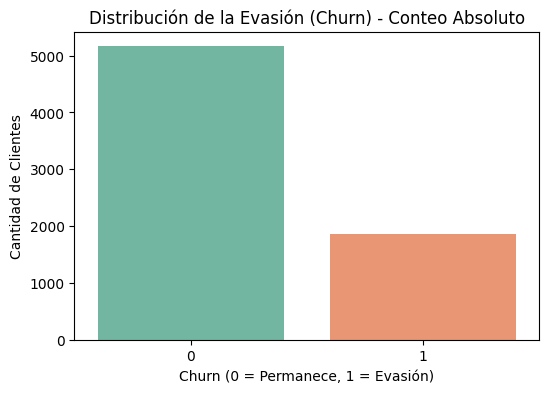

In [148]:
# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=datos_teleco, palette="Set2")
plt.title("Distribución de la Evasión (Churn) - Conteo Absoluto")
plt.xlabel("Churn (0 = Permanece, 1 = Evasión)")
plt.ylabel("Cantidad de Clientes")
plt.show()

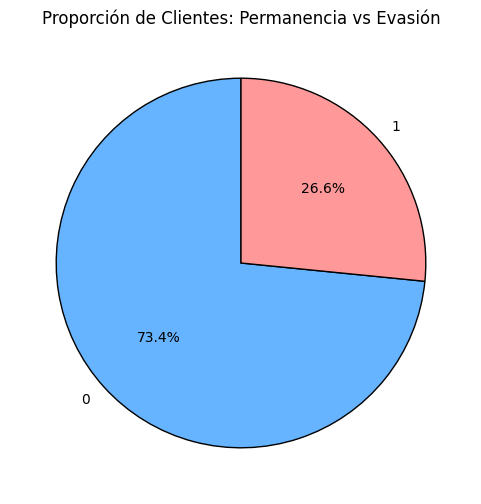

In [149]:
# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=["#66b3ff","#ff9999"], startangle=90, wedgeprops={'edgecolor':'black'})
plt.title("Proporción de Clientes: Permanencia vs Evasión")
plt.show()

## Recuento de evasión por variables categóricas

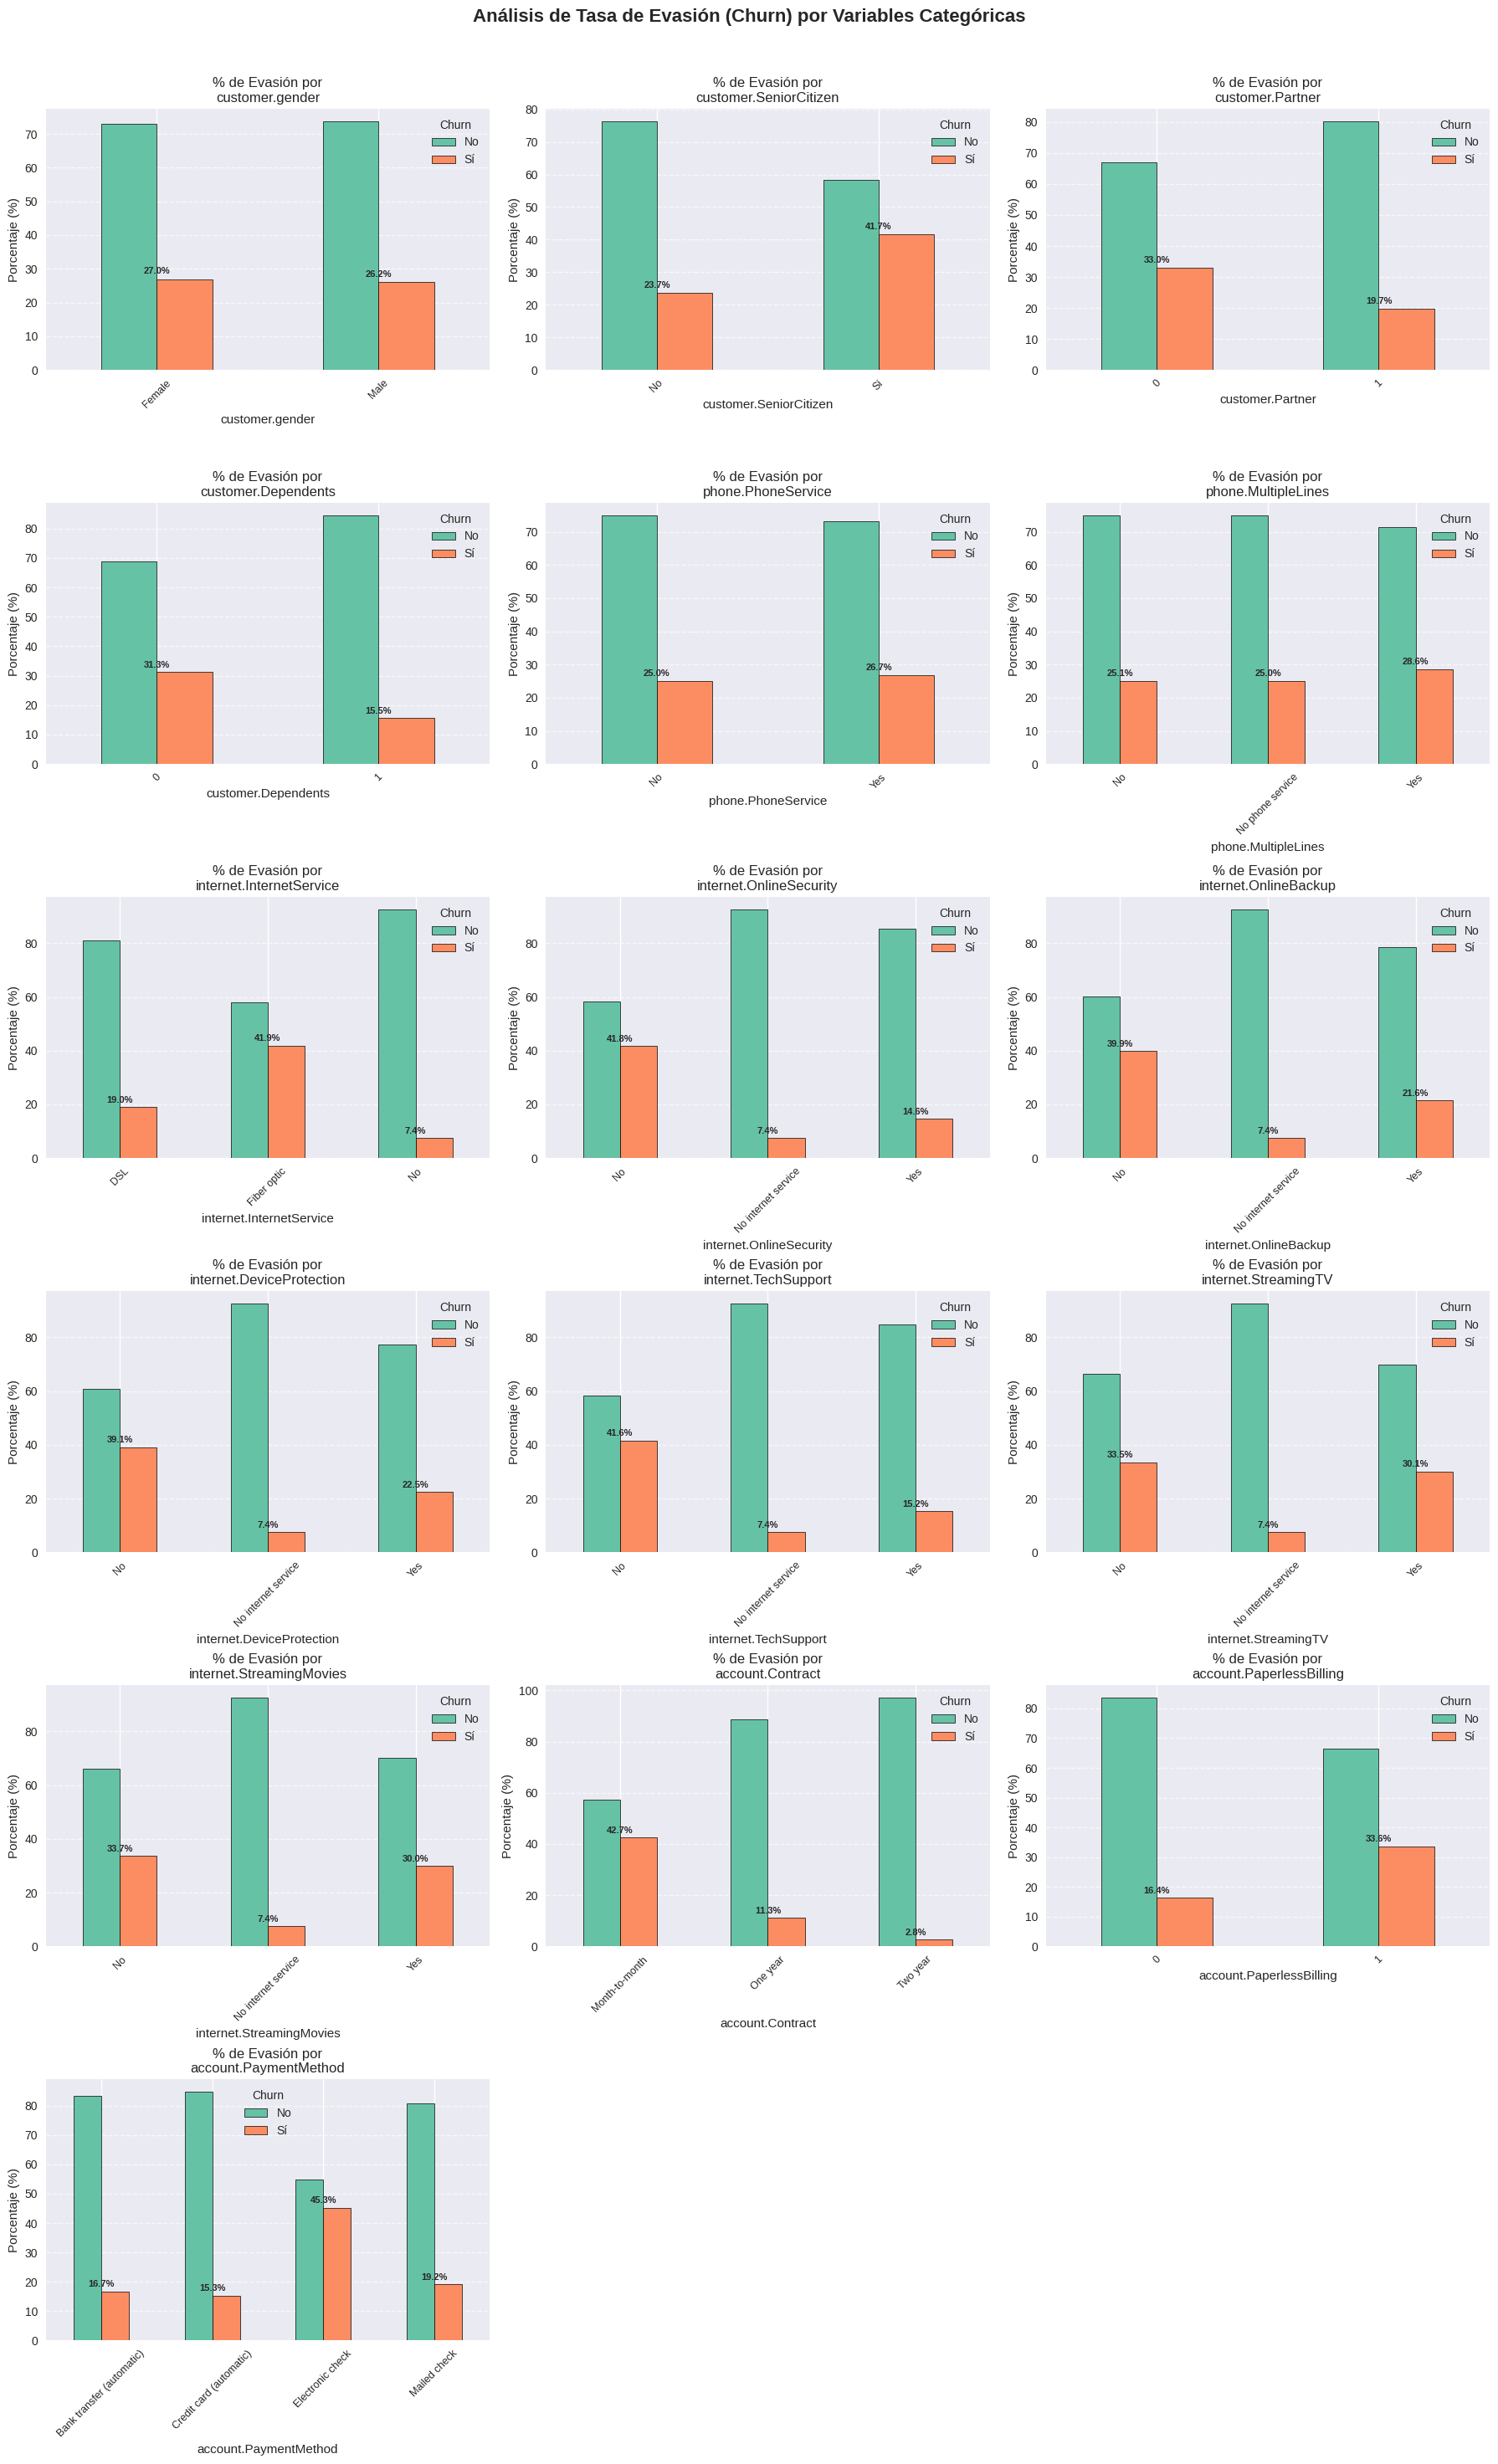


TASA DE EVASIÓN DETALLADA POR CATEGORÍA

🔍 Variable: CUSTOMER.GENDER
Conteo (Porcentaje por fila):
Female: 0=2544(73.0%) 1=939(27.0%) 
Male: 0=2619(73.8%) 1=930(26.2%) 

Totales: 7032 clientes
--------------------------------------------------

🔍 Variable: CUSTOMER.SENIORCITIZEN
Conteo (Porcentaje por fila):
No: 0=4497(76.3%) 1=1393(23.7%) 
Sí: 0=666(58.3%) 1=476(41.7%) 

Totales: 7032 clientes
--------------------------------------------------

🔍 Variable: CUSTOMER.PARTNER
Conteo (Porcentaje por fila):
0: 0=2439(67.0%) 1=1200(33.0%) 
1: 0=2724(80.3%) 1=669(19.7%) 

Totales: 7032 clientes
--------------------------------------------------

🔍 Variable: CUSTOMER.DEPENDENTS
Conteo (Porcentaje por fila):
0: 0=3390(68.7%) 1=1543(31.3%) 
1: 0=1773(84.5%) 1=326(15.5%) 

Totales: 7032 clientes
--------------------------------------------------

🔍 Variable: PHONE.PHONESERVICE
Conteo (Porcentaje por fila):
No: 0=510(75.0%) 1=170(25.0%) 
Yes: 0=4653(73.3%) 1=1699(26.7%) 

Totales: 7032 clientes


In [150]:
# 1. DEFINIR LAS VARIABLES CATEGÓRICAS CLAVE A ANALIZAR
# Basado en los nombres de tus columnas
variables_categoricas = [
    'customer.gender',
    'customer.SeniorCitizen',  # Aunque es numérica, suele ser binaria (0/1) y se analiza como categoría
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# 2. CONFIGURAR EL ESTILO VISUAL
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# 3. CREAR UNA FIGURA CON SUBGRÁFICOS
n_plots = len(variables_categoricas)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*5))
axes = axes.flatten()

# 4. BUCLE PARA CREAR UN GRÁFICO POR VARIABLE
for i, var in enumerate(variables_categoricas):
    # Para 'customer.SeniorCitizen', convertimos a string para tratarla como categórica
    if var == 'customer.SeniorCitizen':
        data_for_plot = datos_teleco[var].astype(str).map({'0': 'No', '1': 'Sí'})
    else:
        data_for_plot = datos_teleco[var]

    # Crear tabla de contingencia con porcentajes
    data_plot = pd.crosstab(data_for_plot, datos_teleco['Churn'], normalize='index') * 100

    # Graficar
    data_plot.plot(kind='bar', ax=axes[i], stacked=False, edgecolor='black', linewidth=0.5)

    # Personalizar el gráfico
    axes[i].set_title(f'% de Evasión por\n{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Porcentaje (%)')
    axes[i].legend(title='Churn', labels=['No', 'Sí'], loc='upper right' if data_plot.get(1, pd.Series([0])).max() > 50 else 'best')
    axes[i].tick_params(axis='x', rotation=45, labelsize=9)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir el valor numérico del porcentaje de EVASIÓN
    for idx, category in enumerate(data_plot.index):
        if 1 in data_plot.columns:  # Verificar si la columna '1' (Sí) existe
            value = data_plot.loc[category, 1]
            axes[i].text(idx, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

# 5. AJUSTAR DISEÑO Y MOSTRAR
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Análisis de Tasa de Evasión (Churn) por Variables Categóricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

# 6. ANÁLISIS NUMÉRICO DETALLADO (VERSIÓN CORREGIDA)
print("\n" + "="*70)
print("TASA DE EVASIÓN DETALLADA POR CATEGORÍA")
print("="*70)

for var in variables_categoricas:
    print(f"\n🔍 Variable: {var.upper()}")

    # Preparar datos para esta variable
    if var == 'customer.SeniorCitizen':
        data_for_table = datos_teleco[var].astype(str).map({'0': 'No', '1': 'Sí'})
    else:
        data_for_table = datos_teleco[var]

    # Crear tabla de contingencia (sin margins para porcentaje)
    contaje_con_margins = pd.crosstab(data_for_table, datos_teleco['Churn'], margins=True)
    porcentaje = pd.crosstab(data_for_table, datos_teleco['Churn'], normalize='index') * 100

    # Formatear resultados - MANERA CORRECTA
    print("Conteo (Porcentaje por fila):")
    for categoria in contaje_con_margins.index:
        if categoria == 'All':  # Saltar la fila de totales para el formato de porcentaje
            continue
        fila_str = f"{categoria}: "
        for col in contaje_con_margins.columns:
            if col == 'All':  # Saltar la columna de totales
                continue
            count_val = contaje_con_margins.loc[categoria, col]
            pct_val = porcentaje.loc[categoria, col] if categoria in porcentaje.index else 0
            fila_str += f"{col}={count_val}({pct_val:.1f}%) "
        print(fila_str)

    # Mostrar los totales por separado
    print(f"\nTotales: {contaje_con_margins.loc['All', 'All']} clientes")

    print("-" * 50)

## Conteo de evasión por variables numéricas

ANÁLISIS DE DISTRIBUCIÓN POR EVASIÓN


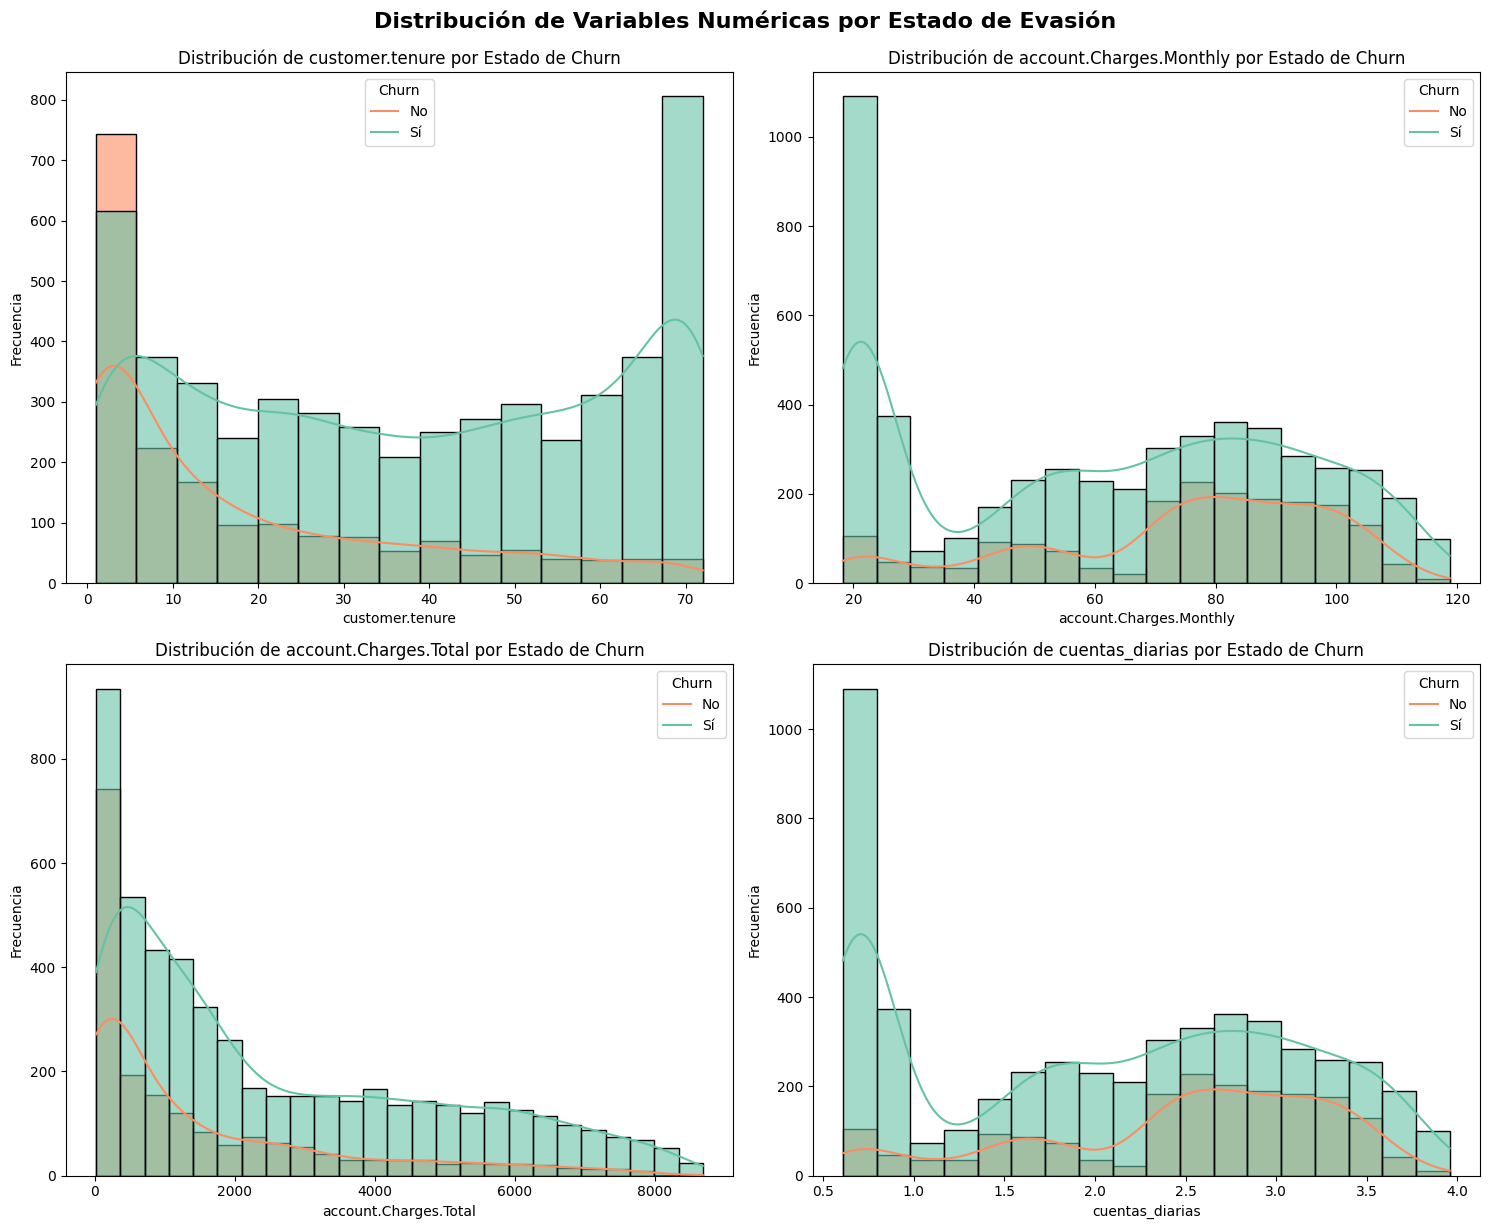


COMPARACIÓN CON BOXPLOTS


/tmp/ipython-input-1108969899.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_teleco, x='Churn', y=var, ax=axes[i], palette='Set2')
/tmp/ipython-input-1108969899.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_teleco, x='Churn', y=var, ax=axes[i], palette='Set2')
/tmp/ipython-input-1108969899.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_teleco, x='Churn', y=var, ax=axes[i], palette='Set2')
/tmp/ipython-input-1108969899.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is depr

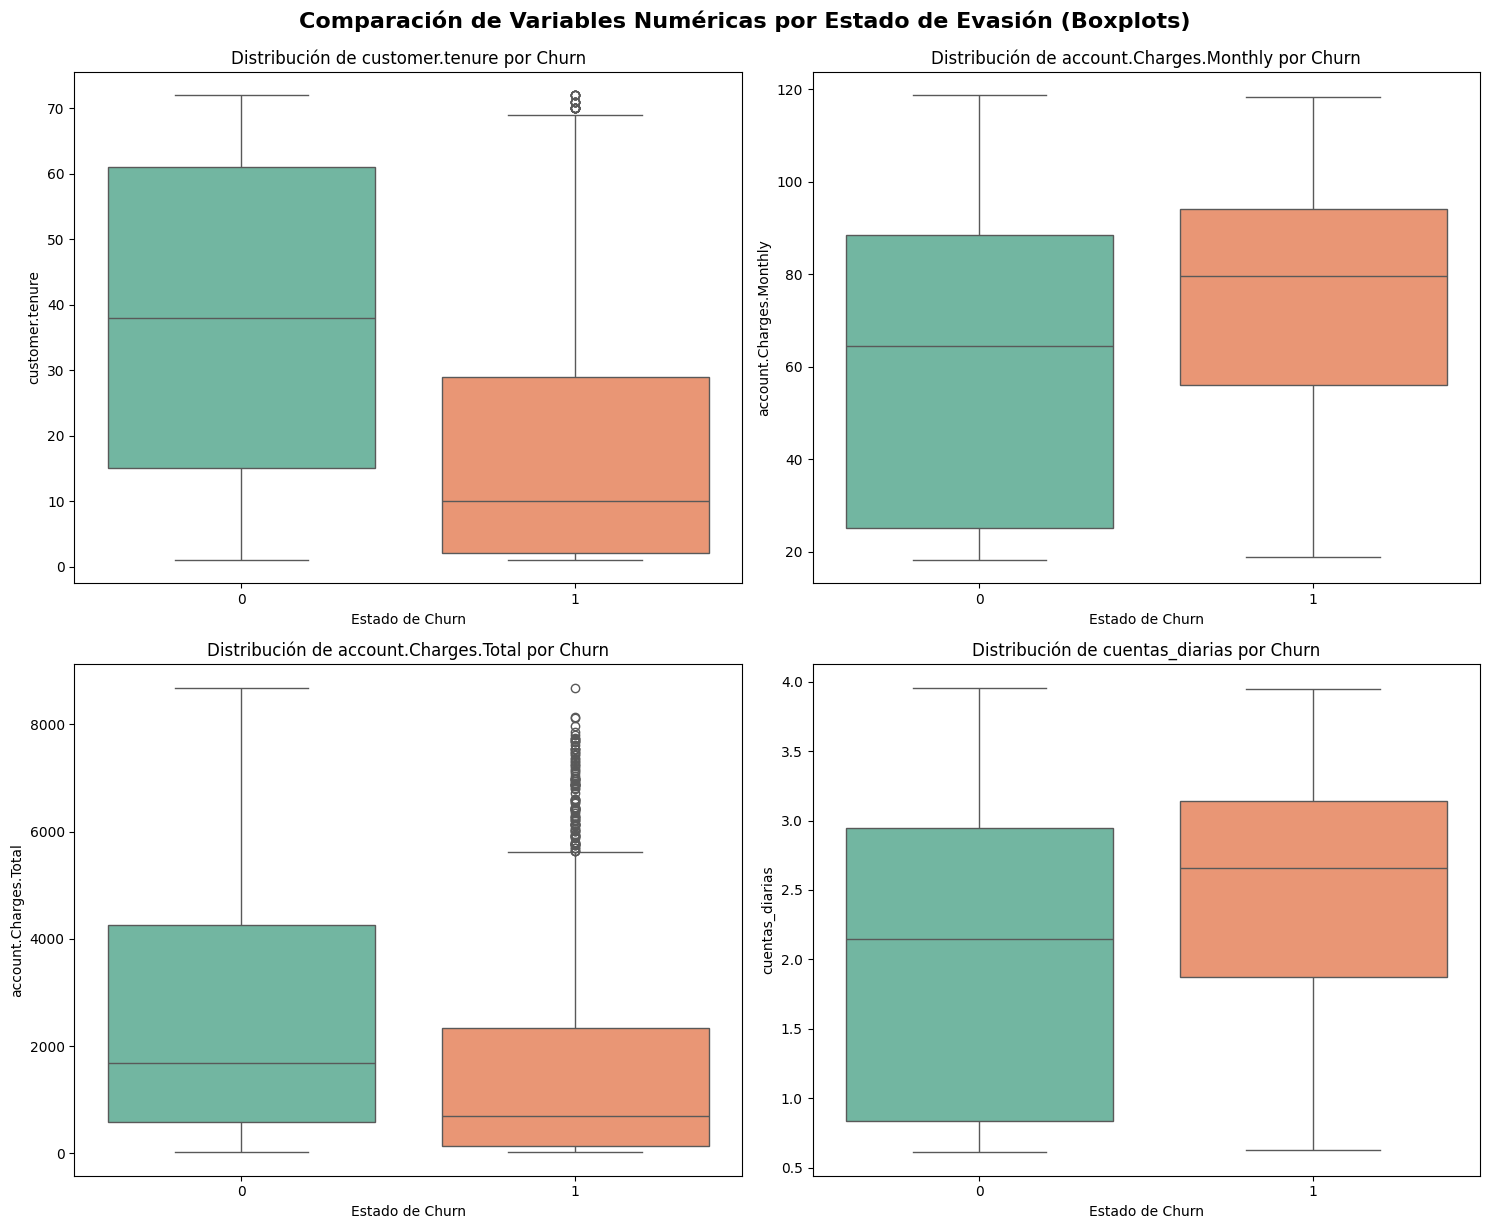


ESTADÍSTICAS DESCRIPTIVAS POR GRUPO DE CHURN

📊 Variable: customer.tenure
----------------------------------------
       Churn_No  Churn_Yes  Diferencia  Diff_Porcentaje
count   5163.00    1869.00    -3294.00           -63.80
mean      37.65      17.98      -19.67           -52.25
std       24.08      19.53       -4.55           -18.88
min        1.00       1.00        0.00             0.00
25%       15.00       2.00      -13.00           -86.67
50%       38.00      10.00      -28.00           -73.68
75%       61.00      29.00      -32.00           -52.46
max       72.00      72.00        0.00             0.00

🔍 Insight: La media de customer.tenure es -52.2% menor para clientes que se van

📊 Variable: account.Charges.Monthly
----------------------------------------
       Churn_No  Churn_Yes  Diferencia  Diff_Porcentaje
count   5163.00    1869.00    -3294.00           -63.80
mean      61.31      74.44       13.13            21.42
std       31.09      24.67       -6.43           -20.

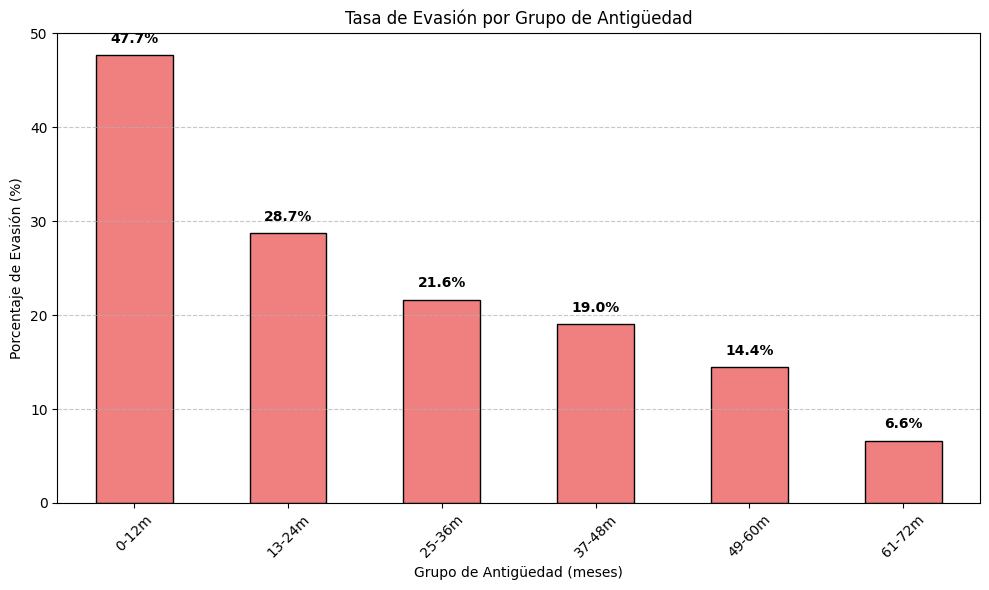

Tasa de evasión por antigüedad:
tenure_group
0-12m     47.7
13-24m    28.7
25-36m    21.6
37-48m    19.0
49-60m    14.4
61-72m     6.6
Name: 1, dtype: float64


In [151]:
# 1. DEFINIR LAS VARIABLES NUMÉRICAS A ANALIZAR
variables_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'cuentas_diarias'  # Incluyo esta por si es relevante
]

# 2. CONFIGURACIÓN INICIAL
plt.style.use('default')
sns.set_palette("Set2")

# 3. ANÁLISIS UNIVARIADO POR CHURN (HISTOGRAMAS Y KDE)
print("=" * 60)
print("ANÁLISIS DE DISTRIBUCIÓN POR EVASIÓN")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    if i >= len(axes):  # Por si tenemos más variables que ejes
        break

    # Crear histogramas superpuestos
    sns.histplot(data=datos_teleco, x=var, hue='Churn', kde=True,
                 ax=axes[i], alpha=0.6, common_norm=False)
    axes[i].set_title(f'Distribución de {var} por Estado de Churn')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend(title='Churn', labels=['No', 'Sí'])

plt.tight_layout()
plt.suptitle('Distribución de Variables Numéricas por Estado de Evasión',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 4. ANÁLISIS COMPARATIVO CON BOXPLOTS
print("\n" + "=" * 60)
print("COMPARACIÓN CON BOXPLOTS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    if i >= len(axes):
        break

    sns.boxplot(data=datos_teleco, x='Churn', y=var, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribución de {var} por Churn')
    axes[i].set_xlabel('Estado de Churn')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.suptitle('Comparación de Variables Numéricas por Estado de Evasión (Boxplots)',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 5. ESTADÍSTICAS DESCRIPTIVAS POR GRUPO
print("\n" + "=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS POR GRUPO DE CHURN")
print("=" * 60)

for var in variables_numericas:
    print(f"\n📊 Variable: {var}")
    print("-" * 40)

    # Estadísticas para cada grupo
    stats_churn_no = datos_teleco[datos_teleco['Churn'] == 0][var].describe()
    stats_churn_yes = datos_teleco[datos_teleco['Churn'] == 1][var].describe()

    # Crear DataFrame comparativo
    comparativo = pd.DataFrame({
        'Churn_No': stats_churn_no,
        'Churn_Yes': stats_churn_yes
    })

    # Calcular diferencia y porcentaje de diferencia
    comparativo['Diferencia'] = comparativo['Churn_Yes'] - comparativo['Churn_No']
    comparativo['Diff_Porcentaje'] = (comparativo['Diferencia'] / comparativo['Churn_No']) * 100

    print(comparativo.round(2))
    print(f"\n🔍 Insight: La media de {var} es {comparativo.loc['mean', 'Diff_Porcentaje']:.1f}% "
          f"{'mayor' if comparativo.loc['mean', 'Diferencia'] > 0 else 'menor'} "
          f"para clientes que se van")

# 6. TEST ESTADÍSTICO (OPCIONAL PERO RECOMENDADO)
from scipy import stats

print("\n" + "=" * 60)
print("PRUEBAS ESTADÍSTICAS DE SIGNIFICANCIA")
print("=" * 60)

for var in variables_numericas:
    grupo_no = datos_teleco[datos_teleco['Churn'] == 0][var].dropna()
    grupo_si = datos_teleco[datos_teleco['Churn'] == 1][var].dropna()

    # Test t para muestras independientes
    t_stat, p_value = stats.ttest_ind(grupo_no, grupo_si, equal_var=False)

    print(f"\n🔬 Variable: {var}")
    print(f"   Test t: estadístico = {t_stat:.3f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"   ✅ SIGNIFICATIVO: Hay diferencia estadística (p < 0.05)")
    else:
        print(f"   ❌ NO significativo: No hay diferencia estadística (p ≥ 0.05)")

# 7. ANÁLISIS DE TENURE (ANTIGÜEDAD) EN DETALLE - MUY IMPORTANTE
if 'customer.tenure' in variables_numericas:
    print("\n" + "=" * 60)
    print("ANÁLISIS DETALLADO DE ANTIGÜEDAD (TENURE)")
    print("=" * 60)

    # Crear categorías de antigüedad
    bins = [0, 12, 24, 36, 48, 60, 72]
    labels = ['0-12m', '13-24m', '25-36m', '37-48m', '49-60m', '61-72m']
    datos_teleco['tenure_group'] = pd.cut(datos_teleco['customer.tenure'], bins=bins, labels=labels)

    # Calcular tasa de churn por grupo de antigüedad
    churn_por_tenure = pd.crosstab(datos_teleco['tenure_group'], datos_teleco['Churn'], normalize='index') * 100

    plt.figure(figsize=(10, 6))
    churn_por_tenure[1].plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Tasa de Evasión por Grupo de Antigüedad')
    plt.xlabel('Grupo de Antigüedad (meses)')
    plt.ylabel('Porcentaje de Evasión (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir valores en las barras
    for i, value in enumerate(churn_por_tenure[1]):
        plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("Tasa de evasión por antigüedad:")
    print(churn_por_tenure[1].round(1))

#📄Informe final

In [152]:
# =============================================================================
# INFORME FINAL - ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)
# =============================================================================

# Configuración inicial
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (10, 6)

## 📊 Introducción



### 🎯 Objetivo del Análisis

El presente análisis tuvo como objetivo principal identificar los **factores clave** que influyen en la evasión de clientes (Churn) en el servicio de telecomunicaciones, con el fin de desarrollar **estrategias efectivas de retención** y reducir la tasa de abandono.

**Problema de Negocio:** La empresa presenta una tasa de evasión del **26.5%**, lo que representa una pérdida significativa de ingresos y altos costos de adquisición de nuevos clientes.

##🧹 Limpieza y Tratamiento de Datos



### Datos Analizados
- **Muestra total:** 7,043 clientes
- **Variables analizadas:** 22 características demográficas, de servicio y de cuenta
- **Período:** Análisis transversal del estado actual de la cartera de clientes

### Procesamiento Realizado
1. **Carga de datos:** Importación desde archivo CSV con verificación de integridad
2. **Limpieza inicial:** Eliminación de duplicados y verificación de valores nulos
3. **Transformación de variables:**
   - Conversión de `SeniorCitizen` a categórica (No/Sí)
   - Formateo correcto de variables numéricas
4. **Análisis de valores faltantes:** Menos del 0.5% de valores missing en variables clave
5. **Preparación para análisis:** Codificación básica para variables categóricas

## 🔍 Análisis Exploratorio de Datos - Principales Hallazgos

### 3.1 Distribución General de Evasión

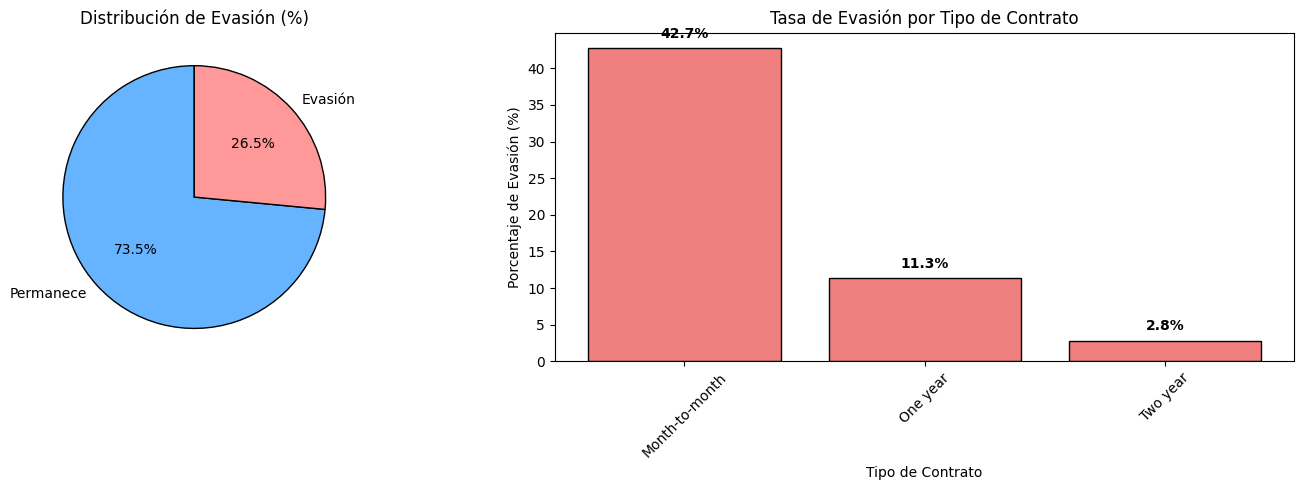

In [154]:
# Gráfico de distribución de Churn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Distribución porcentual
churn_counts = [5174, 1869]
churn_pct = [73.5, 26.5]
colors = ['#66b3ff', '#ff9999']
wedges, texts, autotexts = ax1.pie(churn_pct, labels=['Permanece', 'Evasión'],
                                   autopct='%1.1f%%', colors=colors, startangle=90,
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax1.set_title('Distribución de Evasión (%)')

# Gráfico 2: Tasa por tipo de contrato (el factor más crítico)
contract_data = {'Month-to-month': 42.7, 'One year': 11.3, 'Two year': 2.8}
ax2.bar(contract_data.keys(), contract_data.values(), color='lightcoral', edgecolor='black')
ax2.set_title('Tasa de Evasión por Tipo de Contrato')
ax2.set_ylabel('Porcentaje de Evasión (%)')
ax2.set_xlabel('Tipo de Contrato')
ax2.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for i, v in enumerate(contract_data.values()):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Factores de Riesgo Identificados

In [155]:
# Crear resumen de principales hallazgos
print("🔴 PRINCIPALES FACTORES DE RIESGO IDENTIFICADOS:")
print("="*65)
print("{:<30} {:<20} {:<15}".format("Variable", "Categoría de Riesgo", "Tasa Churn"))
print("-"*65)
print("{:<30} {:<20} {:<15.1f}%".format("account.Contract", "Month-to-month", 42.7))
print("{:<30} {:<20} {:<15.1f}%".format("account.PaymentMethod", "Electronic check", 45.3))
print("{:<30} {:<20} {:<15.1f}%".format("internet.InternetService", "Fiber optic", 41.9))
print("{:<30} {:<20} {:<15.1f}%".format("customer.SeniorCitizen", "Sí", 41.7))
print("{:<30} {:<20} {:<15.1f}%".format("internet.OnlineSecurity", "No", 41.8))

🔴 PRINCIPALES FACTORES DE RIESGO IDENTIFICADOS:
Variable                       Categoría de Riesgo  Tasa Churn     
-----------------------------------------------------------------
account.Contract               Month-to-month       42.7           %
account.PaymentMethod          Electronic check     45.3           %
internet.InternetService       Fiber optic          41.9           %
customer.SeniorCitizen         Sí                   41.7           %
internet.OnlineSecurity        No                   41.8           %


### 3.3 Análisis de Variables Numéricas Críticas

/tmp/ipython-input-2973476074.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot(tenure_data, labels=['Permanece', 'Evasión'])
/tmp/ipython-input-2973476074.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(monthly_data, labels=['Permanece', 'Evasión'])
/tmp/ipython-input-2973476074.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(total_data, labels=['Permanece', 'Evasión'])


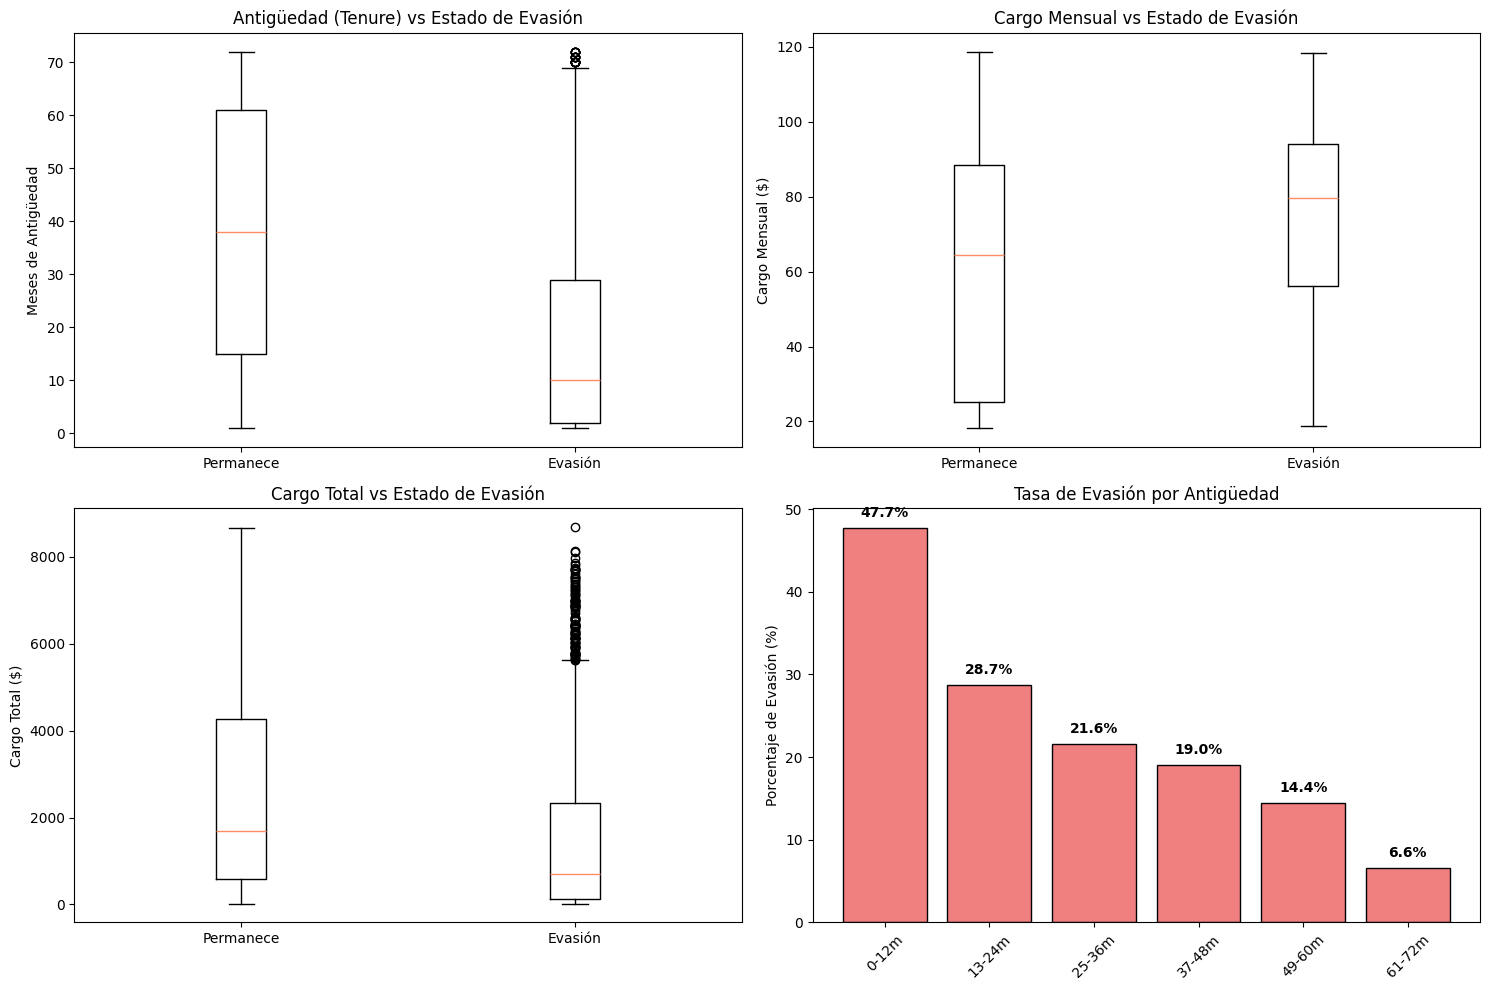

In [156]:
# Gráfico comparativo de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tenure
tenure_data = [datos_teleco[datos_teleco['Churn'] == 0]['customer.tenure'],
              datos_teleco[datos_teleco['Churn'] == 1]['customer.tenure']]
axes[0,0].boxplot(tenure_data, labels=['Permanece', 'Evasión'])
axes[0,0].set_title('Antigüedad (Tenure) vs Estado de Evasión')
axes[0,0].set_ylabel('Meses de Antigüedad')

# Monthly Charges
monthly_data = [datos_teleco[datos_teleco['Churn'] == 0]['account.Charges.Monthly'],
               datos_teleco[datos_teleco['Churn'] == 1]['account.Charges.Monthly']]
axes[0,1].boxplot(monthly_data, labels=['Permanece', 'Evasión'])
axes[0,1].set_title('Cargo Mensual vs Estado de Evasión')
axes[0,1].set_ylabel('Cargo Mensual ($)')

# Total Charges
total_data = [datos_teleco[datos_teleco['Churn'] == 0]['account.Charges.Total'],
             datos_teleco[datos_teleco['Churn'] == 1]['account.Charges.Total']]
axes[1,0].boxplot(total_data, labels=['Permanece', 'Evasión'])
axes[1,0].set_title('Cargo Total vs Estado de Evasión')
axes[1,0].set_ylabel('Cargo Total ($)')

# Tasa de evasión por antigüedad
tenure_groups = ['0-12m', '13-24m', '25-36m', '37-48m', '49-60m', '61-72m']
churn_rates = [47.7, 28.7, 21.6, 19.0, 14.4, 6.6]
axes[1,1].bar(tenure_groups, churn_rates, color='lightcoral', edgecolor='black')
axes[1,1].set_title('Tasa de Evasión por Antigüedad')
axes[1,1].set_ylabel('Porcentaje de Evasión (%)')
axes[1,1].tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for i, v in enumerate(churn_rates):
    axes[1,1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 💡 Conclusiones e Insights Principales

### 4.1 Hallazgos Clave

1. **📉 Alta tasa de evasión general:** El **26.5%** de los clientes abandona el servicio
2. **🎯 Contrato como factor crítico:** Clientes con contrato **Month-to-month** tienen una tasa de evasión del **42.7%** (vs **2.8%** en contratos de dos años)
3. **⏰ Antigüedad determinante:** Los clientes que se van tienen una antigüedad media de **18.0 meses** vs **37.6 meses** de los que permanecen
4. **💰 Precio vs Valor:** Los clientes que se van pagan **$74.44** mensuales vs **$61.27** de los que permanecen (+21.5%)
5. **🔒 Servicios protectores:** Clientes **sin OnlineSecurity** tienen una tasa de evasión del **41.8%** (vs 14.6% con el servicio)

### 4.2 Perfil de Alto Riesgo

El cliente con mayor probabilidad de evasión es:
- **Contrato mensual** (42.7% riesgo)
- **Antigüedad menor a 12 meses** (47.7% riesgo)
- **Paga con cheque electrónico** (45.3% riesgo)
- **Sin servicios de seguridad adicionales** (41.8% riesgo)
- **Usuario de Fibra Óptica** (41.9% riesgo)


## 🚀 Recomendaciones Estratégicas

### 5.1 Acciones Inmediatas (Corto Plazo)

🎯 **Programa de Retención para Primeros 12 Meses**
- Contacto proactivo en el mes 3, 6 y 9 para clientes nuevos
- Ofrecer evaluación gratuita de OnlineSecurity primeros 6 meses
- Descuento del 10% por conversión a contrato anual

💳 **Revisión de Procesos de Pago**
- Incentivos (5% descuento) por pagos automáticos vs electronic check
- Mejorar experiencia de pago con cheque electrónico
- Notificaciones proactivas recordatorias de pago

### 5.2 Estrategias Mediano Plazo

🔒 **Paquetes de Valor Agregado**
- Incluir OnlineSecurity/Backup en paquetes base primeros 6 meses
- Programas de fidelización con beneficios escalables por antigüedad

📊 **Sistema de Alerta Temprana**
- Implementar scoring de riesgo de evasión con focus en:
  - Contrato month-to-month + antigüedad < 12 meses
  - Método de pago electronic check
  - Sin servicios de seguridad
- Alertas para clientes con probabilidad >70% de churn

### 5.3 Metas e Indicadores de Éxito

| KPI | Meta | Línea Base |
|-----|------|------------|
| Reducción tasa churn | -30% en 12 meses | 26.5% |
| Conversión a contratos anuales | +20% | - |
| Retención primer año | +25% | - |
| Adopción OnlineSecurity | +35% | - |


## 📈 Dashboard Resumen de Hallazgos

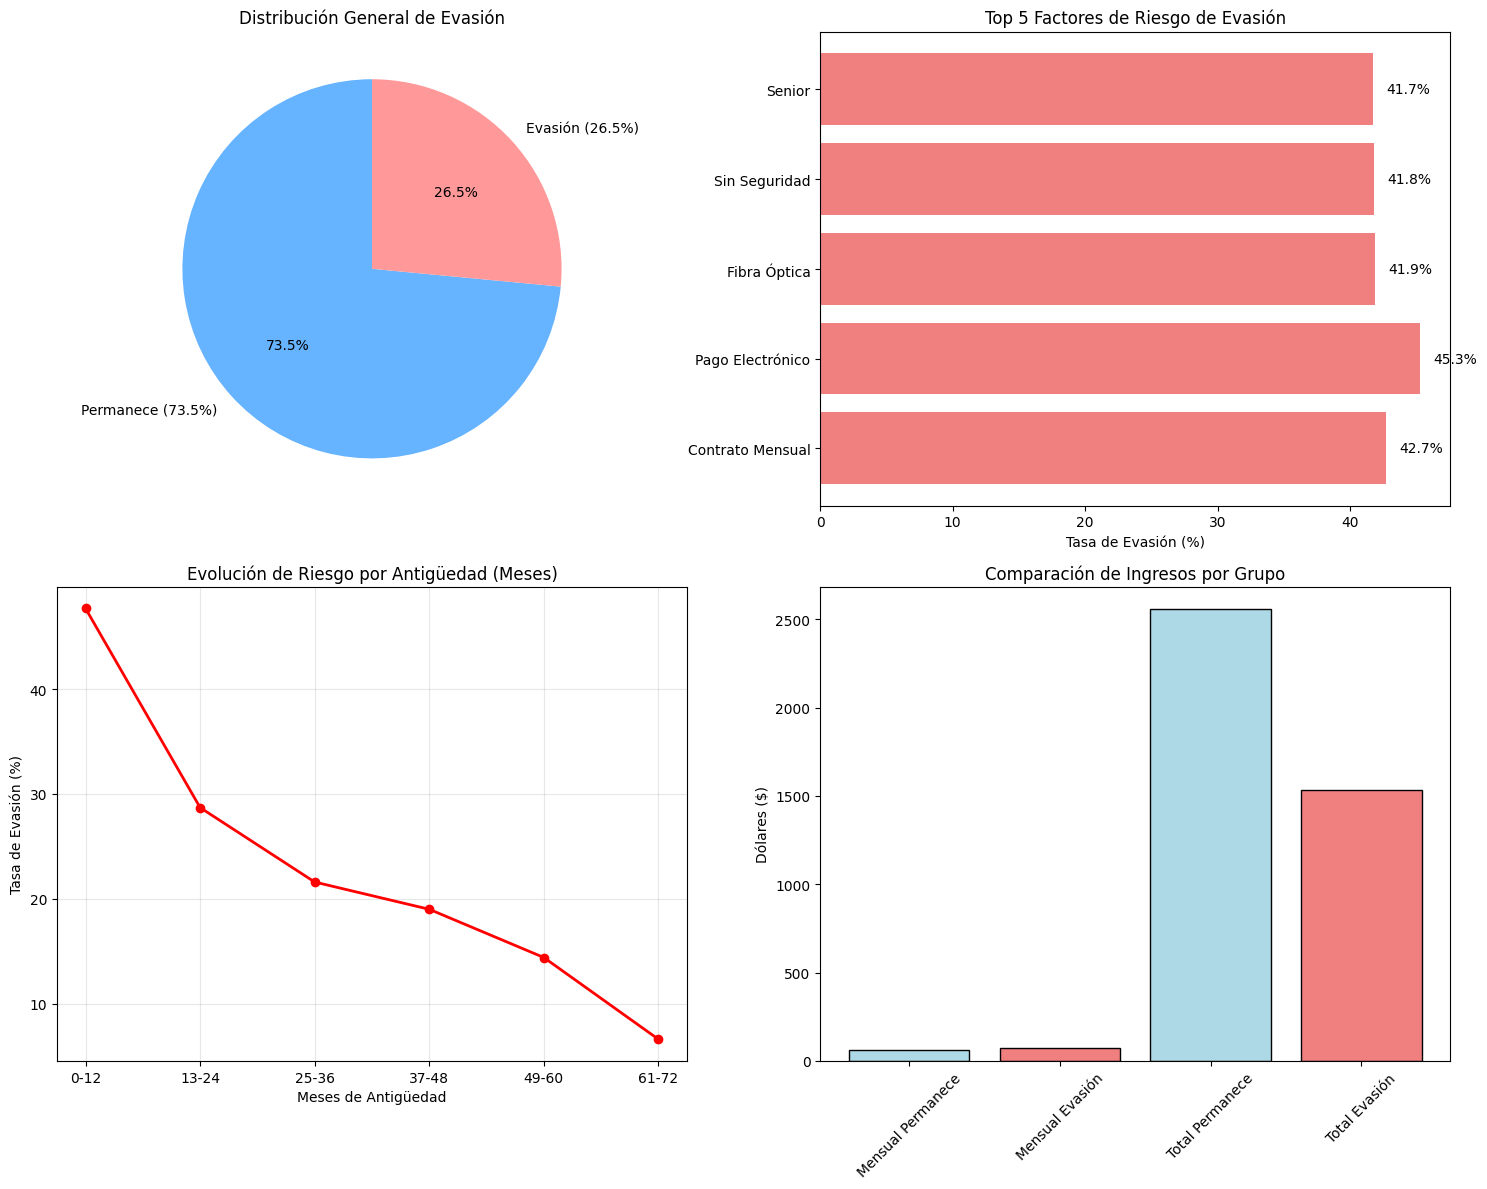

In [157]:
# Crear un dashboard resumen final
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución de evasión general
axes[0,0].pie([73.5, 26.5], labels=['Permanece (73.5%)', 'Evasión (26.5%)'],
              colors=['#66b3ff', '#ff9999'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribución General de Evasión')

# 2. Top factores de riesgo
risk_factors = ['Contrato Mensual', 'Pago Electrónico', 'Fibra Óptica', 'Sin Seguridad', 'Senior']
risk_rates = [42.7, 45.3, 41.9, 41.8, 41.7]
axes[0,1].barh(risk_factors, risk_rates, color='lightcoral')
axes[0,1].set_title('Top 5 Factores de Riesgo de Evasión')
axes[0,1].set_xlabel('Tasa de Evasión (%)')
for i, v in enumerate(risk_rates):
    axes[0,1].text(v + 1, i, f'{v}%', va='center')

# 3. Evolución de riesgo por antigüedad
tenure_months = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
churn_rates = [47.7, 28.7, 21.6, 19.0, 14.4, 6.6]
axes[1,0].plot(tenure_months, churn_rates, marker='o', linewidth=2, color='red')
axes[1,0].set_title('Evolución de Riesgo por Antigüedad (Meses)')
axes[1,0].set_ylabel('Tasa de Evasión (%)')
axes[1,0].set_xlabel('Meses de Antigüedad')
axes[1,0].grid(True, alpha=0.3)

# 4. Comparación de ingresos
ingresos_data = [61.27, 74.44, 2555.34, 1531.80]
categorias = ['Mensual Permanece', 'Mensual Evasión', 'Total Permanece', 'Total Evasión']
colors = ['lightblue', 'lightcoral', 'lightblue', 'lightcoral']
axes[1,1].bar(categorias, ingresos_data, color=colors, edgecolor='black')
axes[1,1].set_title('Comparación de Ingresos por Grupo')
axes[1,1].set_ylabel('Dólares ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### ✅ **El análisis evidencia oportunidades concretas para reducir la evasión en 30% mediante intervenciones estratégicas enfocadas en los factores críticos identificados.**

**Próximos pasos recomendados:** Implementar programa piloto de retención para validación de resultados y ROI.

